# EDA

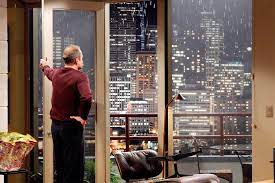

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data = pd.read_csv('data/Housing_data.csv')

In [3]:
data.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,9106000005,4.000,2.250,3750.000,5000.000,2.000,0.000,0.000,5,8,...,1310.000,1924,0.000,98115,47.675,-122.303,2170.000,4590.000,2015-05-27,1310000.000
1,5101400871,2.000,1.750,1390.000,6670.000,1.000,0.000,0.000,3,6,...,670.000,1941,0.000,98115,47.691,-122.308,920.000,6380.000,2015-05-24,445500.000
2,7923600250,5.000,2.000,1870.000,7344.000,1.500,0.000,0.000,3,7,...,0.000,1960,0.000,98007,47.595,-122.144,1870.000,7650.000,2015-05-15,450000.000
3,9178601660,5.000,3.000,3320.000,5354.000,2.000,NaN,0.000,3,9,...,0.000,2004,0.000,98103,47.654,-122.331,2330.000,4040.000,2015-05-14,1700000.000
4,6815100380,3.000,1.750,1900.000,4000.000,1.000,0.000,0.000,3,7,...,600.000,1965,NaN,98103,47.685,-122.331,1880.000,4000.000,2015-05-14,855000.000


In [4]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


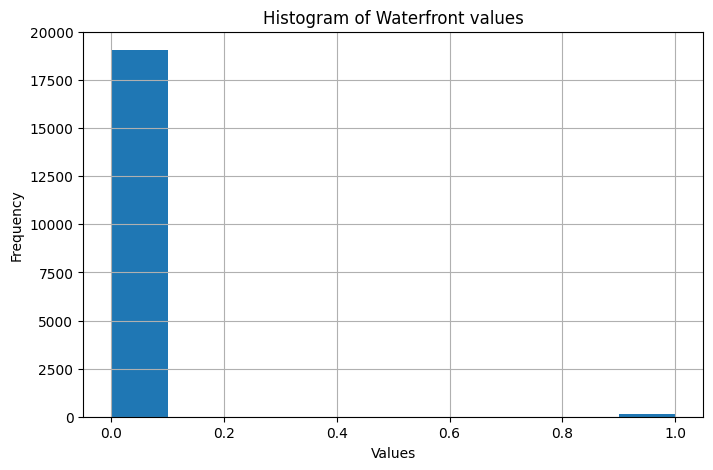

In [7]:
data['waterfront'].hist()
plt.title('Histogram of Waterfront values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

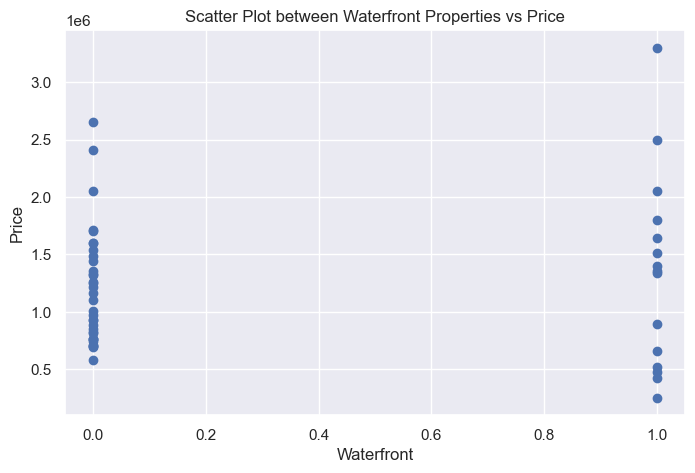

In [120]:
plt.scatter(data['waterfront'], data['price'])
plt.title('Scatter Plot between Waterfront Properties vs Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

In [17]:
# The waterfront column should be changed to boolean values, as floats are not ideal

data['waterfront'] = data['waterfront'].astype(bool)
threshold = 0  
# All values over 0 can be assumed to be near a waterfront
data['waterfront'] = (data['waterfront'] > threshold)
# To save the data to a new csv now that the data cleaning process has begun
data.to_csv('data/Housing_data_modified.csv', index=False)

In [19]:
data = pd.read_csv('data/Housing_data_modified.csv')

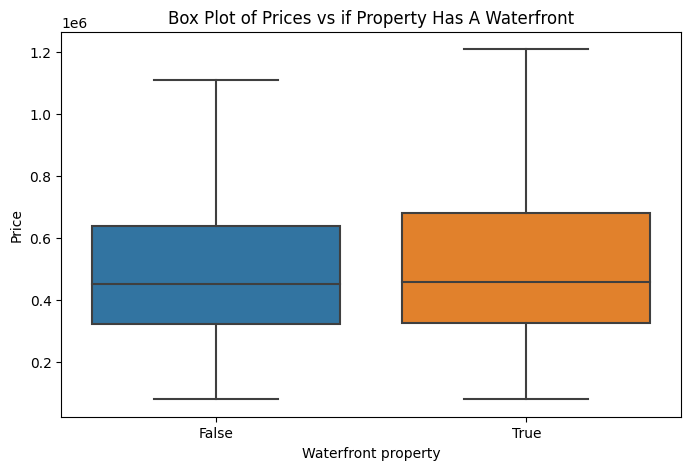

In [25]:
sns.boxplot(x='waterfront', y='price', data=data, showfliers=False)
plt.title('Box Plot of Prices vs if Property Has A Waterfront')
plt.xlabel('Waterfront property')
plt.ylabel('Price')
plt.show()

In [28]:
# This does not show much of a difference in price if a property has a waterfront. It is also interesting to see the box plots
# when the outliers are still included, as even the outliers do not vary much between waterfront vs no waterfront

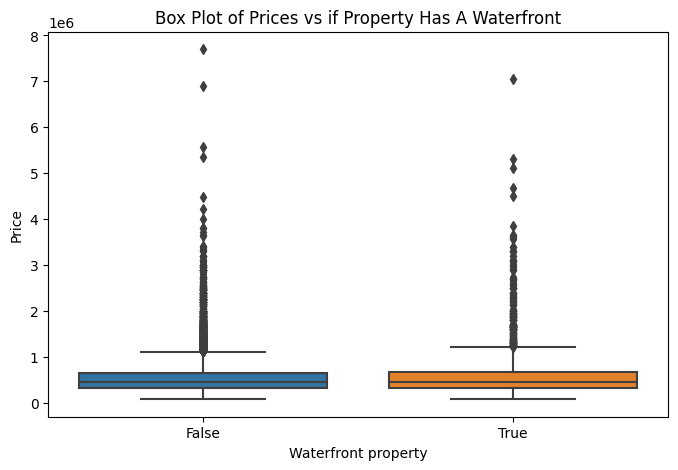

In [27]:
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('Box Plot of Prices vs if Property Has A Waterfront')
plt.xlabel('Waterfront property')
plt.ylabel('Price')
plt.show()

In [22]:
# This shows that higher priced properties are not really more likely to be waterfront properties. [INSIGHT #1]

# However this box plot also shows the data needs to be cleaned more. I will remove the bottom 60% priced properties,
# as the buyer has a high budget. This does not necessarily mean the buyer will be looking for the most expensive home
# possible however, so I will start with cleaning the data to show the top 40% priced properties.

In [43]:
data = pd.read_csv('data/Housing_data_modified.csv')
data.sort_values(by='price', ascending=False)
rows_to_keep = int(len(data) * 0.4)
filtered_data = data[:rows_to_keep]
filtered_data.to_csv('data/Housing_data_modified_top40.csv', index=False)

In [45]:
df = pd.read_csv('data/Housing_data_modified_top40.csv')
df = df[df['yr_renovated'] != 0]
df = df.dropna(subset=['yr_renovated'])
df.to_csv('data/Housing_data_modified_top40renovated.csv', index=False)

In [46]:
# Next I will plot a scatter plot of price vs grade, to see if the data needs to be sorted or cleaned according to the grade, 
# as 'high grade' was a requirement of the client

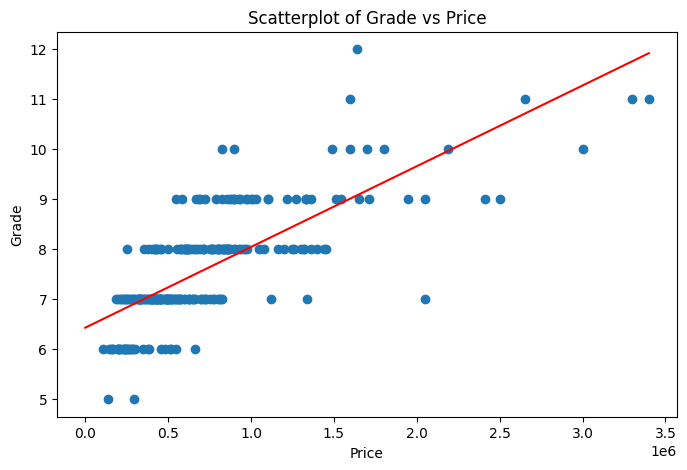

In [55]:
df = pd.read_csv("data/Housing_data_modified_top40renovated.csv")
plt.scatter(df["price"], df["grade"])
plt.title("Scatterplot of Grade vs Price")
plt.xlabel("Price")
plt.ylabel("Grade")
from scipy.optimize import curve_fit
def linear_fit(x, m, b):
    return m * x + b
popt, _ = curve_fit(linear_fit, df["price"], df["grade"])
x_fit = np.linspace(min(df["grade"]), max(df["price"]), 100)  # Create points for the curve fit
y_fit = linear_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r', label="Best Fit Curve (Linear)")
plt.show()

In [64]:
# This is the graph, showing a positive correlation albeit a vague one. The client can be advised that most of the higher priced
# listings will be reflected by a higher grade [INSIGHT #2]

In [100]:
# Lastly to have covered the majority of the clients needs, I will see if there is a relationship between number of times properties
# have been viewed, and zip code. This will be my geographical insight, and I hypothesize that there will be certain
# more diserable zip codes where the properties are viewed more often. This will be useful information for the client, as she wants
# to resell within a year. First I will remove the properties with zero viewings.

In [115]:
data = pd.read_csv('data/Housing_data_modified_top40renovated.csv')
view = 'view'
data = data[data[view] != 0]
data = data.sort_values(by='view', ascending=False)
data.to_csv('data/Housing_data_modified_top40renovated_viewcleaned.csv', index=False)

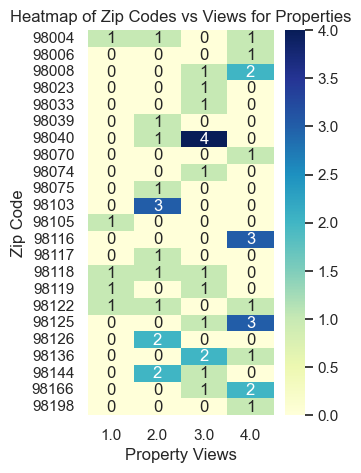

In [121]:
df = pd.read_csv('data/Housing_data_modified_top40renovated_viewcleaned.csv')
sns.set()
plt.figure(figsize=(3, 5))
heatmap_data = data.pivot_table(index='zipcode', columns='view', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

plt.xlabel('Property Views')
plt.ylabel('Zip Code')
plt.title('Heatmap of Zip Codes vs Views for Properties')
plt.show()

In [ ]:
# This heat map shows an interesting relationship between zip codes and property views.
# 98008, 98040, 98116, 98118, 98122, 98125, 98136, 98144, 98166 are the zip codes that
# appear to have the most property viewing activity. These can be recommended to the client
# as areas to buy, as she wants to sell the property after a year. [INSIGHT #3]